## Digit Recognizer - Machine Learning Exploration

This notebook explores building a machine learning model for recognizing handwritten digits using the MNIST dataset.

We'll utilize Python libraries like TensorFlow or PyTorch to train a neural network model and evaluate its performance on classifying the digits.

**Dependencies:**

* TensorFlow/PyTorch
* NumPy, Pandas (for data manipulation)

**Data Source:**

* MNIST Dataset: [https://www.kaggle.com/datasets/hojjatk/mnist-dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset)

**References:**

* Deep Learning Book: [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)


## Importing Packages

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from keras.models import Sequential

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Get The Data (Train & TEST Data)

In [6]:
!kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 92.1MB/s]
100% 15.3M/15.3M [00:00<00:00, 130MB/s] 


In [7]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [72]:
# Load and preprocess the MNIST dataset
TrainData = pd.read_csv("/content/train.csv")

Labels = TrainData.iloc[:, 0]
# Convert labels to one-hot encoded format
Labels_ = to_categorical(Labels)

TrainData = TrainData.drop(columns=TrainData.columns[0], axis=1) # drop labels

TestData  = pd.read_csv("/content/test.csv")

# Reshape and normalize the input images

#1- Extract the pixel values from the TrainData & TestData
image_pixels  = TrainData.iloc[:, :].values
image_pixelsT = TestData.iloc[:, :].values

#2- Reshape the pixel values for each image into a 28x28
reshaped_images  = image_pixels.reshape(-1, 28, 28, 1)
reshaped_imagesT = image_pixelsT.reshape(-1, 28, 28, 1)

In [59]:
print(f"The Size Of The Train Data : {len(TrainData)}")

The Size Of The Train Data : 42000


In [60]:
print(f"The Size Of The Test Data : {len(TestData)}")

The Size Of The Test Data : 28000


## Some Info About My DATA

### What Lables

In [61]:
LABELS = Labels.unique()

In [62]:
print(f'Lables Are : {np.sort(LABELS)}')

Lables Are : [0 1 2 3 4 5 6 7 8 9]


### How Much

In [63]:
COUNT=Labels.value_counts()

In [64]:
DF = pd.DataFrame(COUNT)
DF

,label
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063
5,3795


### Now Let Us See Some Samples Of Our DATA

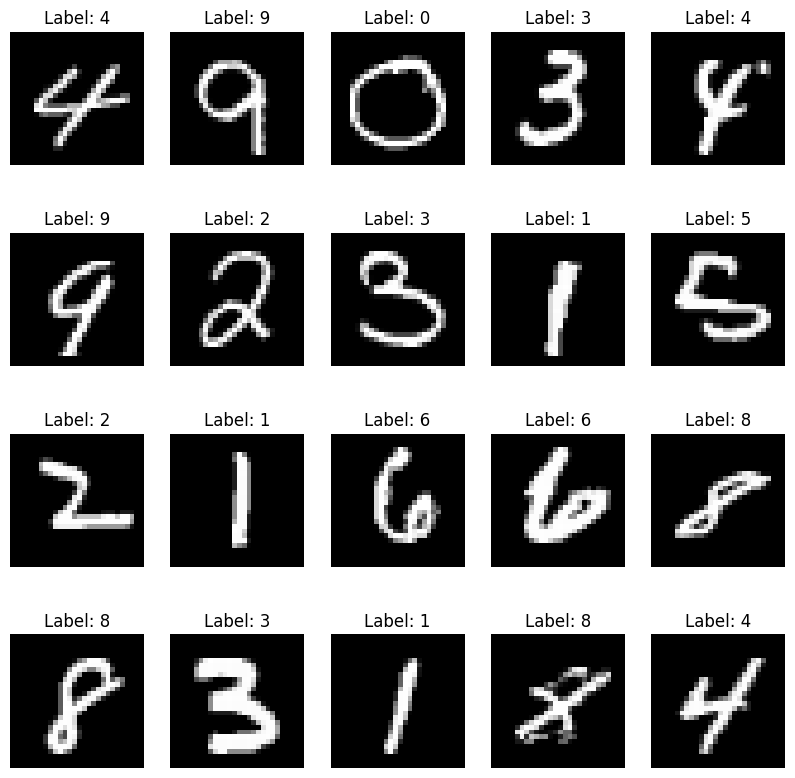

In [65]:
#Here We Chise Just # Images From Our Data
random_indices = np.random.randint(0, len(TrainData), size=20)

#Then Visualize It
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 10))

for i, ax in zip(random_indices, axes.flatten()):
    ax.imshow(reshaped_images[i], cmap='gray')
    ax.set_title(f'Label: {Labels[i]}') # Here We Put The Lable Above Each Image
    ax.axis('off')
plt.show()

## Create A Model (CNN Model)

In [84]:
model = Sequential([
    layers.Conv2D(64, (4, 4), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(4, 4), strides=(1, 1), padding='same'),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same'),

    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Another Form

In [ ]:
model = Sequential()

# Convolutional Layers with Dropout
model.add(layers.Conv2D(64, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(4, 4), strides=(1, 1), padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same'))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# Flatten Layer
model.add(layers.Flatten())

# Dense Layers with Dropout
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Some Details

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        16448     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 22, 22, 64)       

In [86]:
print(reshaped_images.shape)
print(Labels_.shape)

(42000, 28, 28, 1)
(42000, 10)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_images, Labels_, test_size=0.2, random_state=42)

## Train The Model

In [107]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [117]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
237/237 [==============================] - 4s 16ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0355 - val_accuracy: 0.9899
Epoch 2/100
237/237 [==============================] - 3s 15ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.0078 - val_accuracy: 0.9976
Epoch 3/100
237/237 [==============================] - 3s 14ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 4/100
237/237 [==============================] - 3s 14ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.0160 - val_accuracy: 0.9955
Epoch 5/100
237/237 [==============================] - 4s 15ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.0295 - val_accuracy: 0.9932
Epoch 6/100
237/237 [==============================] - 3s 14ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0150 - val_accuracy: 0.9967
Epoch 7/100
237/237 [==============================] - 3s 14ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0097 - val_accuracy:

In [118]:
# Evaluate the model on the test set
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {round(test_acc, 3)*100}%')

263/263 [==============================] - 1s 4ms/step - loss: 0.0835 - accuracy: 0.9870
Test accuracy: 98.7%


In [119]:
# # To save it
# model.save('Model_DL_98_7.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# # # To load it
# from keras.models import load_model
# loaded_model = load_model('Model_DL_98_7.h5')

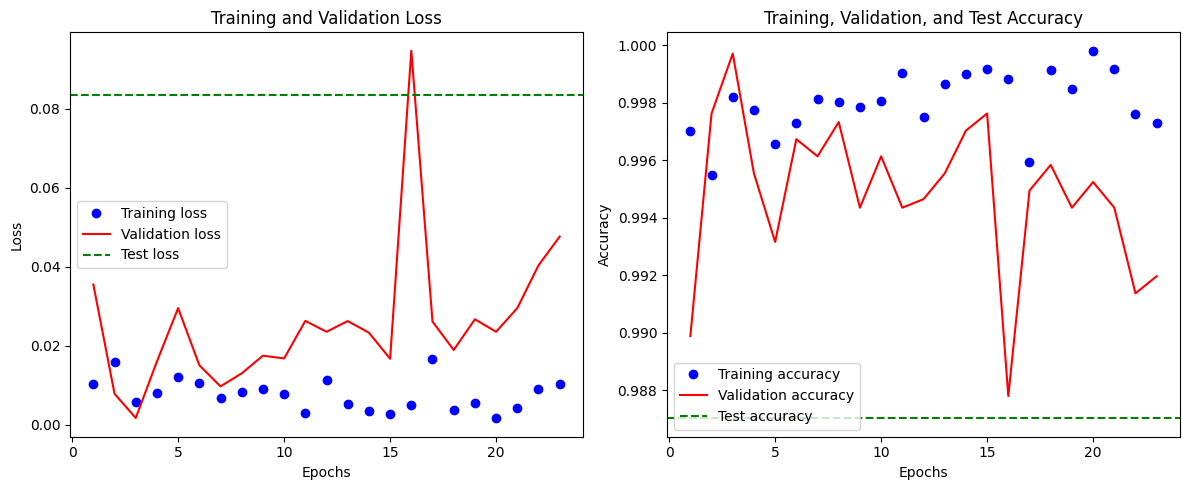

In [120]:
train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc    = history.history['val_accuracy']
val_loss   = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Visualize The Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.axhline(y=test_loss, color='g', linestyle='--', label='Test loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualize The Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.axhline(y=test_acc, color='g', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Predict Some Data

In [121]:
def predict_image(model, image):
    # Preprocess the image (reshape and normalize)
    # input_image = np.reshape(image, (1, 28, 28, 1)).astype('float32') / 255.0

    predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=1)
    return predicted_label

1/1 [==============================] - 0s 19ms/step


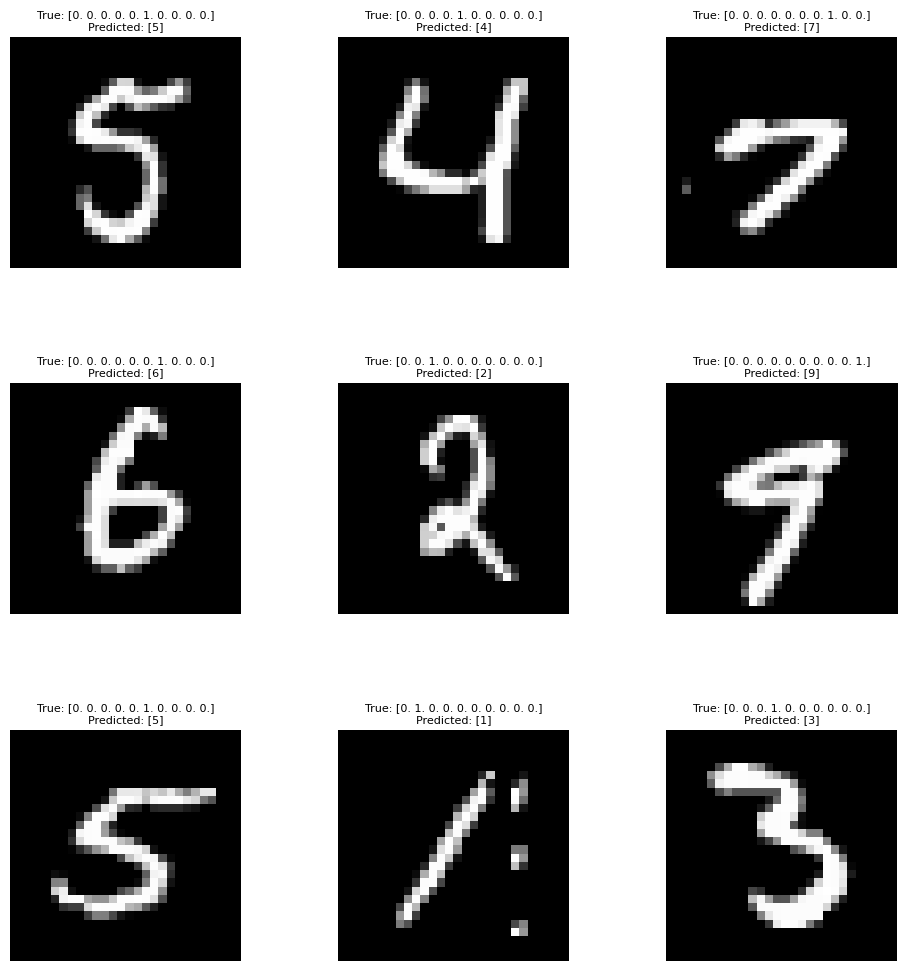

In [122]:
# Randomly select num_subplots indices
sample_indices = np.random.choice(len(X_test), 9, replace=False)

# Create a (3x3) grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axes.flatten()):
    if i < 9:
        sample_index = sample_indices[i]
        sample_image = X_test[sample_index]
        true_label = y_test[sample_index]

        # Predict the label using your function
        predicted_label = predict_image(model, sample_image)

        # Display the image
        ax.imshow(np.squeeze(sample_image), cmap='gray')
        ax.axis('off')

        # Set the title with true and predicted labels
        title = f'True: {true_label}\nPredicted: {predicted_label}'
        ax.set_title(title, fontsize=8)

plt.show()

## NOW Let Us Get Out The Submition File

In [133]:
# Initialize an empty list to store the predictions
predictions = []

# Loop through the test images
for index, row in TestData.iterrows():
    image_id = index + 1  # Increment index to start image_id from 1
    image_data = row.values.reshape(28, 28, 1)  # Reshape image data to match model input shape

    # Predict the label of the image
    predicted_label = predict_image(model, image_data)

    # Append image_id and predicted_label to the predictions list
    predictions.append({'image_id': image_id, 'predicted_label': predicted_label[0]})

# Create a DataFrame from the predictions list
predictions_df = pd.DataFrame(predictions)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step


In [134]:
# Save the DataFrame to a CSV file
predictions_df.to_csv("/content/predictions.csv", index=False)

# **Thanks**